Linear Regression R² Score: 0.9665
Linear Regression MSE: 1964849901524344.00

Polynomial Regression (Degree=2) R² Score: 0.9989
Polynomial Regression (Degree=2) MSE: 63584060728209.50

Ridge Regularization R² Score: 0.9989
Ridge Regularization MSE: 63584060588656.17

Lasso Regularization R² Score: 0.9989
Lasso Regularization MSE: 63584058988153.27



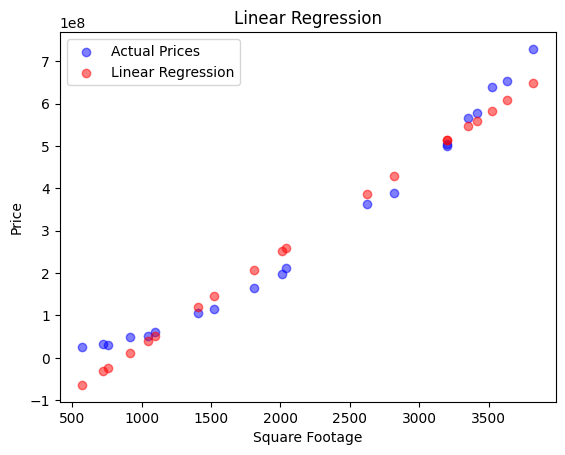

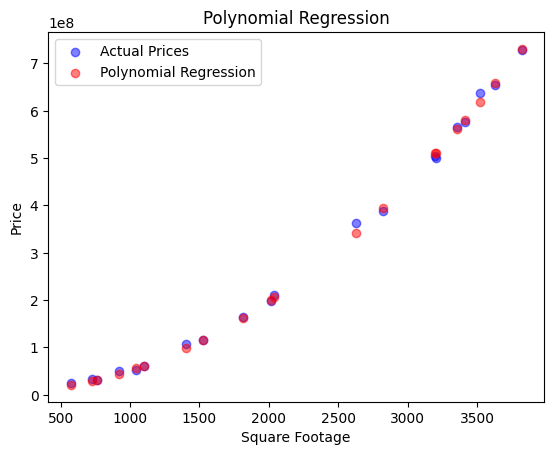

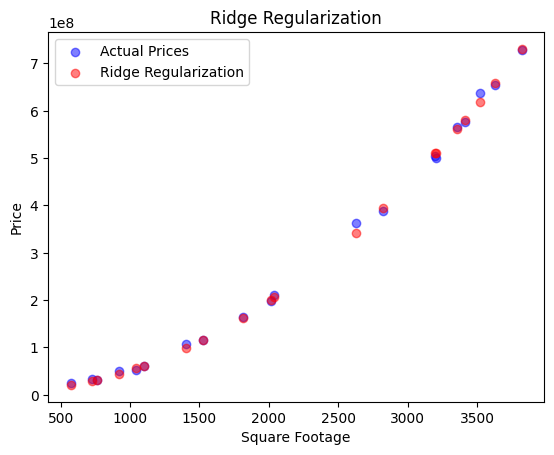

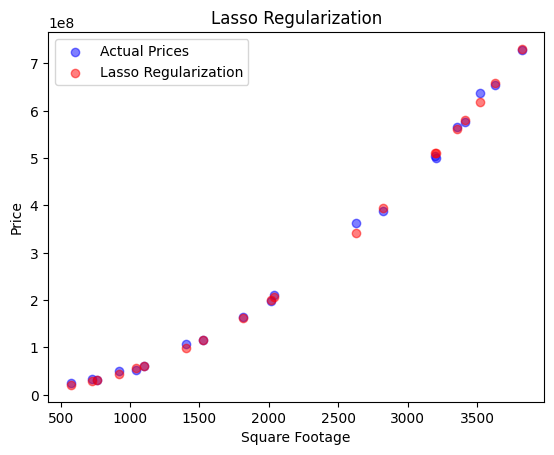

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Generate Synthetic Housing Data
np.random.seed(42)
X = np.random.uniform(500, 4000, 100).reshape(-1, 1)  # Square footage
true_prices = 50 * (X**2) - 3 * X + np.random.normal(0, 1e7, (100, 1))  # Non-linear price

df = pd.DataFrame({'SquareFootage': X.flatten(), 'Price': true_prices.flatten()})

def plot_data():
    plt.figure(figsize=(8, 5))
    plt.scatter(df['SquareFootage'], df['Price'], color='blue', alpha=0.5)
    plt.xlabel("Square Footage")
    plt.ylabel("Price")
    plt.title("Housing Data: Non-Linear Relationship")
    plt.show()

# 2️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(X, true_prices, test_size=0.2, random_state=42)

# 3️⃣ Train Linear Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_linear = lin_reg.predict(X_test)

# 4️⃣ Polynomial Features
poly = PolynomialFeatures(degree=2)  # Try degree=2 first
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# 5️⃣ Ridge & Lasso Regularization
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)

lasso = Lasso(alpha=1e3)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)

# 6️⃣ Model Evaluation
def evaluate_model(name, y_true, y_pred):
    print(f"{name} R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"{name} MSE: {mean_squared_error(y_true, y_pred):.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_linear)
evaluate_model("Polynomial Regression (Degree=2)", y_test, y_pred_poly)
evaluate_model("Ridge Regularization", y_test, y_pred_ridge)
evaluate_model("Lasso Regularization", y_test, y_pred_lasso)

# 7️⃣ Plot Results
def plot_predictions(y_pred, title):
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Prices")
    plt.scatter(X_test, y_pred, color='red', alpha=0.5, label=title)
    plt.xlabel("Square Footage")
    plt.ylabel("Price")
    plt.legend()
    plt.title(title)
    plt.show()

plot_predictions(y_pred_linear, "Linear Regression")
plot_predictions(y_pred_poly, "Polynomial Regression")
plot_predictions(y_pred_ridge, "Ridge Regularization")
plot_predictions(y_pred_lasso, "Lasso Regularization")
